# Pytorch

An open source machine learning framework with a rich ecosystem of libraries, tools, and more to support development.

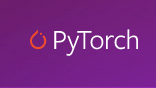

https://pytorch.org/ecosystem/


# Tensors

## Tensors and Numpy arrays

In [ ]:
import torch
import numpy as np 

a_tensor = torch.ones(3)
a_numpy = a_tensor.numpy()
a_numpy[2] = 7.
b_tensor = torch.from_numpy(a_numpy)

print(a_tensor)
print(a_numpy)
print(b_tensor)

tensor([1., 1., 7.])
[1. 1. 7.]
tensor([1., 1., 7.])


## Attributes of a tensor

In [ ]:
# Attributes of a tensor

print(f"Shape of tensor: {b_tensor.shape}")
print(f"Datatype of tensor: {b_tensor.dtype}")
print(f"Device tensor is stored on: {b_tensor.device}")

Shape of tensor: torch.Size([3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on tensors

In [ ]:
#shape = (channels, rows, columns)
img_t = torch.randn(3,5,5)                         
weights = torch.tensor([0.2126, 0.7152, 0.0722])

#shape (batch, channels, rows, columns)
batch_t = torch.randn(2, 3, 5, 5)                 

Standard numpy-like indexing and slicing

In [ ]:
# Standard numpy-like indexing and slicing

batch_t[1,1,...]

tensor([[-0.1582,  0.7919,  0.0997,  1.2132,  0.9083],
        [ 1.5488,  1.0383, -0.4324, -1.4521, -0.0778],
        [ 1.4912,  0.8537,  1.3548,  0.0795,  0.2460],
        [-0.2539,  1.9210,  0.3677,  0.1047, -1.1613],
        [-0.6299,  0.3222,  0.2208,  0.2279, -0.7190]])

Joining Tensors

In [ ]:
# Joining tensors

batch_demo_t = torch.cat([img_t, img_t], dim=1)

print(f"Shape of img_t: {img_t.shape}")
print(f"Shape of batch_demo_t: {batch_demo_t.shape}")

Shape of img_t: torch.Size([3, 5, 5])
Shape of batch_demo_t: torch.Size([3, 10, 5])


Matrix multiplication

In [ ]:

y1 = img_t @ img_t
y2 = img_t.matmul(img_t)
y3 = torch.rand_like(img_t)
torch.matmul(img_t, img_t, out=y3)

print(f"Shape of y1: {y1.shape}")
print(f"Shape of y2: {y2.shape}")
print(f"Shape of y3: {y3.shape}")

Shape of y1: torch.Size([3, 5, 5])
Shape of y2: torch.Size([3, 5, 5])
Shape of y3: torch.Size([3, 5, 5])


Element-wise multiplication


In [ ]:

z1 = img_t * img_t
z2 = img_t.mul(img_t)
z3 = torch.rand_like(img_t)
torch.mul(img_t, img_t, out=z3)

print(f"Shape of z1: {z1.shape}")
print(f"Shape of z2: {z2.shape}")
print(f"Shape of z3: {z3.shape}")

Shape of z1: torch.Size([3, 5, 5])
Shape of z2: torch.Size([3, 5, 5])
Shape of z3: torch.Size([3, 5, 5])


Broadcasting

In [2]:
import torch 
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(3, 4)
tensor3 = tensor1 + tensor2
tensor3.size()

torch.Size([10, 3, 4])

Single Element Tensor

In [ ]:
# Averaging across one dimension
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)

print(f"Shape of img_gray_naive: {img_gray_naive.size()}")
print(f"Shape of batch_gray_naive: {batch_gray_naive.size()}")


Shape of img_gray_naive: torch.Size([5, 5])
Shape of batch_gray_naive: torch.Size([2, 5, 5])


In Place Operations

In [ ]:
a = torch.ones(3, 2)
a.zero_()
a.unsqueeze_(-1)
print(a.size())
print(a)

torch.Size([3, 2, 1])
tensor([[[0.],
         [0.]],

        [[0.],
         [0.]],

        [[0.],
         [0.]]])


Indexing into storage

In [ ]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0]

4.0

In [ ]:
# Storages are pointers. When changing the number of a storage, the corresponging tensor
# also changes

points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [ ]:
# We can get the second point in the tensor by providing the corresponnding index:

points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
print(second_point)
print(f"Second point offset: {second_point.storage_offset()}")
print(f"Second point stride: {second_point.stride()}")

tensor([5., 3.])
Second point offset: 2
Second point stride: (1,)


In [ ]:
# Clone tensors

points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1].clone()
second_point[0] = 10.0
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

Moving tensors to GPU

In [ ]:
import torch

points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
if torch.cuda.is_available():
  points_gpu = points.to(device='cuda')

In [ ]:
# If our machine has more than one GPU, we can also decide on which GPU we allocate the tensor by passing 
# a zero-based integer indentifying the GPU on the machine.
if torch.cuda.is_available():
  points_gpu = points.to(device = 'cuda:0')

In [ ]:
points = 2 * points           #Multiplication performed on CPU
points_gpu = 2 * points_gpu   #Multiplication performed on GPU

points_gpu

tensor([[16.,  4.],
        [20., 12.],
        [ 8.,  4.]], device='cuda:0')

In [ ]:
# In order to move the tensor back to the CPU, we need to provide 'cpu' to 'to' method of the tensor 

points_cpu = points_gpu.to(device='cpu')
points_cpu

tensor([[16.,  4.],
        [20., 12.],
        [ 8.,  4.]])

Serializing tensors

In [ ]:
# PyTorch uses 'pickle' under the hood to serialize the tensor object, plus dedicated serialization code
# for the storage

torch.save(points, 'points.t')

In [ ]:
points = torch.load('points.t')
points

tensor([[16.,  4.],
        [20., 12.],
        [ 8.,  4.]])

# The Learning Problem

We have a model with some unknown parameters, and we need to estimate those parameters so that the error between predicted outputs and measured values is as low as possible.

In [ ]:
import torch 

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

print(t_c.shape)
print(t_u.shape)

torch.Size([11])
torch.Size([11])


In [ ]:
# Now we define a function representing our model 
def model(t_u, w, b):
  return w * t_u + b

# Define loss function (mean square loss)
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
# We can now initizalize the parameters an invoke the model 
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

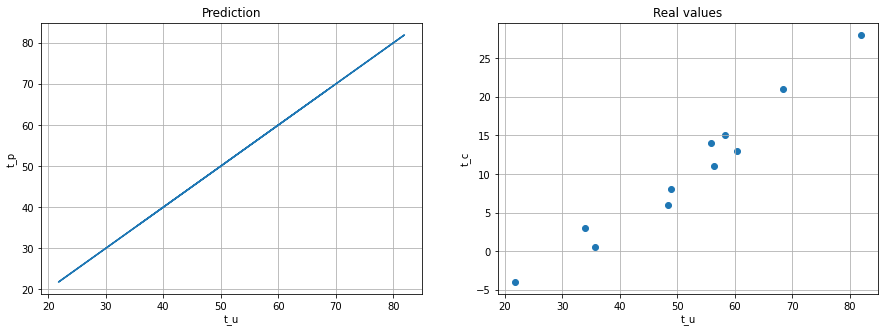

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2,nrows=1, figsize=(15,5))
axs = axs.ravel()
axs[0].plot(t_u.detach().numpy(), t_p.detach().numpy())
axs[0].set_title('Prediction')
axs[0].set_xlabel('t_u')
axs[0].set_ylabel('t_p')
axs[0].grid()

axs[1].scatter(t_u.detach().numpy(), t_c.detach().numpy())
axs[1].set_title('Real values')
axs[1].set_xlabel('t_u')
axs[1].set_ylabel('t_c')
axs[1].grid()


### Gradient Descent

$\frac{\partial L}{\partial w} = lim_{\Delta x \rightarrow 0} \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}$


In [ ]:
# Compute derivative
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) /(2.0 * delta)
loss_rate_of_change_w

tensor(4517.2974)

$w_{k + 1} = w_{k} - \alpha \frac{\partial L}{\partial w_{k}}$

In [ ]:
# Update weight with learning rate
learning_rate = 1e-2
w = w - learning_rate*loss_rate_of_change_w
w

tensor(-44.1730)

In [ ]:
# We can do the same with b:

# 1. Compute the derivative (rate of change of the loss respect to b)
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) /(2.0 * delta)

# 2. Update b in the direction that minimizes the loss (opposite to the gradient)
b = b - learning_rate * loss_rate_of_change_b
b

tensor(46.)

### Iterating to fit a the model


In [ ]:
import torch
# Derivative of the loss with respect to its  input

def dloss_fn(t_p, t_c):
  dsq_diffs = 2*(t_p - t_c) / t_p.size(0) #The division is from the derivative of mean 
  return dsq_diffs

# Applying the derivatives to the model (derivative of the model respect to its weights)
def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

# Putting all of this together, the function returning the gradient of the loss with respect 
# to w and b is 

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()]) #Sum over all training points - Here is where mini-batch should take place

# Iterating loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  loss_list = list()
  for epoch in range(1, n_epochs + 1):
    w, b = params

    #Forward pass
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    loss_list.append(loss)

    #Backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad 
    print(f'Epoch: {epoch}\nLoss: {loss}\nGrad: {grad}')
  
  return params, loss_list

In [ ]:
t_un = 0.1 * t_u 

params, loss_list = training_loop(n_epochs=100, 
                                  learning_rate=1e-2, 
                                  params = torch.tensor([1.0, 0.0]),
                                  t_u = t_un,
                                  t_c = t_c)

Epoch: 1
Loss: 80.36434173583984
Grad: tensor([-77.6140, -10.6400])
Epoch: 2
Loss: 37.574913024902344
Grad: tensor([-30.8623,  -2.3864])
Epoch: 3
Loss: 30.871076583862305
Grad: tensor([-12.4631,   0.8587])
Epoch: 4
Loss: 29.756193161010742
Grad: tensor([-5.2218,  2.1327])
Epoch: 5
Loss: 29.507152557373047
Grad: tensor([-2.3715,  2.6310])
Epoch: 6
Loss: 29.3924560546875
Grad: tensor([-1.2492,  2.8241])
Epoch: 7
Loss: 29.298828125
Grad: tensor([-0.8071,  2.8970])
Epoch: 8
Loss: 29.208717346191406
Grad: tensor([-0.6325,  2.9227])
Epoch: 9
Loss: 29.119415283203125
Grad: tensor([-0.5633,  2.9298])
Epoch: 10
Loss: 29.030488967895508
Grad: tensor([-0.5355,  2.9295])
Epoch: 11
Loss: 28.941877365112305
Grad: tensor([-0.5240,  2.9264])
Epoch: 12
Loss: 28.853565216064453
Grad: tensor([-0.5190,  2.9222])
Epoch: 13
Loss: 28.765552520751953
Grad: tensor([-0.5165,  2.9175])
Epoch: 14
Loss: 28.6778507232666
Grad: tensor([-0.5150,  2.9126])
Epoch: 15
Loss: 28.590431213378906
Grad: tensor([-0.5138,  2.9

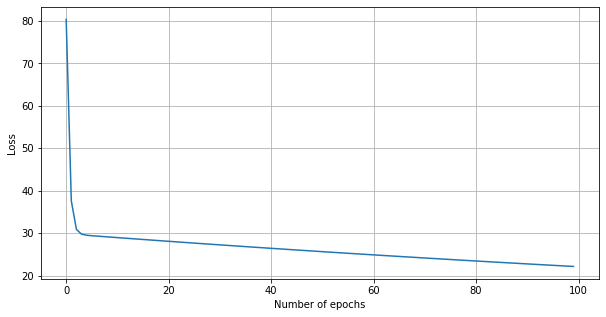

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(range(len(loss_list)), loss_list)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

In [ ]:
if params.grad is not None:
  params.grad.zero_()

In [ ]:
import torch
import torch.optim as optim

params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
# Training loop

def training_loop(n_epochs, optimizer, params, t_u, t_c):
  loss_list = list()
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss_list.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epoch {epoch}, Loss {float(loss)}')
  return params, loss_list

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_un = 0.1 * t_u 

params, loss_list = training_loop(n_epochs=5000,
                                  optimizer = optimizer,
                                  params = params,
                                  t_u = t_un,
                                  t_c = t_c)

Epoch 500, Loss 7.860119819641113
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


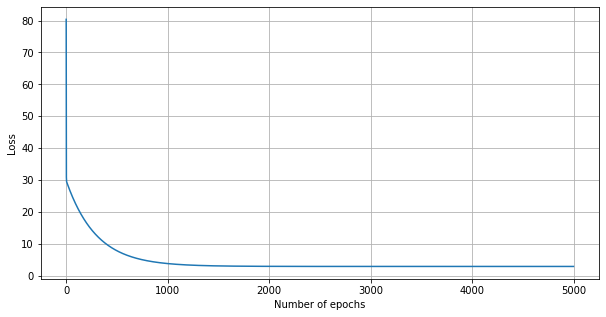

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
plt.plot(range(len(loss_list)), loss_list)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

No handles with labels found to put in legend.


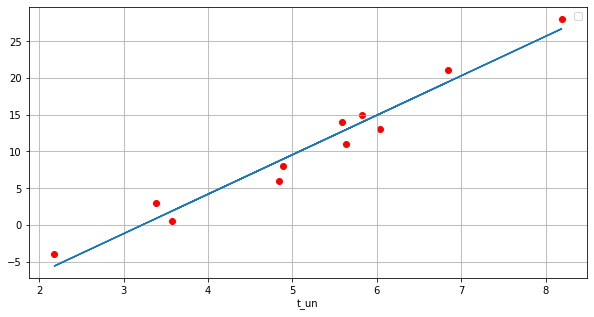

In [ ]:
t_pred = model(t_un, *params)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_un.detach().numpy(), t_pred.detach().numpy())
plt.scatter(t_un, t_c, c='red')
plt.grid()
plt.xlabel('t_un')
plt.legend()
fig.show()

### Training, Validation and Overfitting

In [ ]:
# Splitting a dataset: Shuffling the elements of a tensor to find a premutation of 
# its indices with randperm
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [ ]:
# Pytorch allows us to switch off autograd when we do not need it, using the torch.no_grad
# context manater. We do not want gradients to be updated with validation set.
import torch

def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  val_loss_list = list()
  trn_loss_list = list()
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    trn_loss_list.append(train_loss)

    with torch.no_grad():
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      val_loss_list.append(val_loss)
      assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward() #We backward on training data
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f'Epoch {epoch}, Training Loss {train_loss.item():.4f},'
            f'Validation Loss {val_loss.item():.4f}')
  
  return params, trn_loss_list, val_loss_list

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

params, trn_loss_list, val_loss_list = training_loop(n_epochs=5000,
                                                     optimizer=optimizer,
                                                     params = params,
                                                     train_t_u = train_t_un,
                                                     val_t_u = val_t_un,
                                                     train_t_c = train_t_c,
                                                     val_t_c = val_t_c)

Epoch 1, Training Loss 85.6554,Validation Loss 56.5547
Epoch 2, Training Loss 43.9632,Validation Loss 11.2589
Epoch 3, Training Loss 36.8792,Validation Loss 4.2194
Epoch 500, Training Loss 7.1544,Validation Loss 2.7312
Epoch 1000, Training Loss 3.5517,Validation Loss 2.5743
Epoch 1500, Training Loss 3.1001,Validation Loss 2.5225
Epoch 2000, Training Loss 3.0435,Validation Loss 2.5046
Epoch 2500, Training Loss 3.0364,Validation Loss 2.4983
Epoch 3000, Training Loss 3.0355,Validation Loss 2.4961
Epoch 3500, Training Loss 3.0354,Validation Loss 2.4953
Epoch 4000, Training Loss 3.0354,Validation Loss 2.4950
Epoch 4500, Training Loss 3.0354,Validation Loss 2.4949
Epoch 5000, Training Loss 3.0354,Validation Loss 2.4949


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.plot(range(len(trn_loss_list[10:])), trn_loss_list[10:], c='blue', label='training loss')
plt.plot(range(len(val_loss_list[10:])), val_loss_list[10:], c='red', label='validation loss')
plt.grid()
plt.xlabel('Error')
plt.legend()
fig.show()

# Dataset and DataLoader

In [ ]:
!pip install torch==1.3.0 torchvision==0.4.1

     |████████████████████████████████| 773.1 MB 12 kB/s 
  Using cached torchvision-0.4.1-cp37-cp37m-manylinux1_x86_64.whl (10.1 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.3.0 which is incompatible.


***Dataset*** stores the samples and their corresponding labels, and ***DataLoader*** wraps an iterable around the Dataset to enable easy access to the samples.

A custom Dataset class must implement three functions: ***\__init__***, ***\__len__***, and ***\__getitem__***.

The ***\__getitem__*** function loads and returns a sample from the dataset at the given index. Based on the index, it identifies the image’s location on disk, converts that to a tensor, retrieves the corresponding label, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

The ***Dataset*** retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

***DataLoader*** is an iterable that abstracts this complexity for us in an easy API.

***DataLoader*** offers a solution for parallelizing data loading. Setting the argument ***num_workers*** as a positive integer will turn on multi-process data loading with the specified number of loader worker processes.

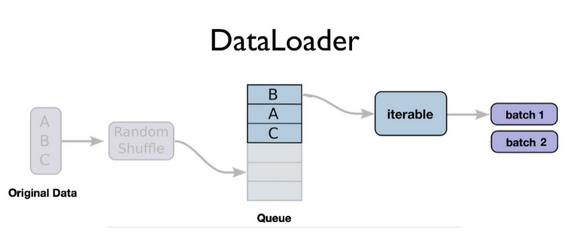


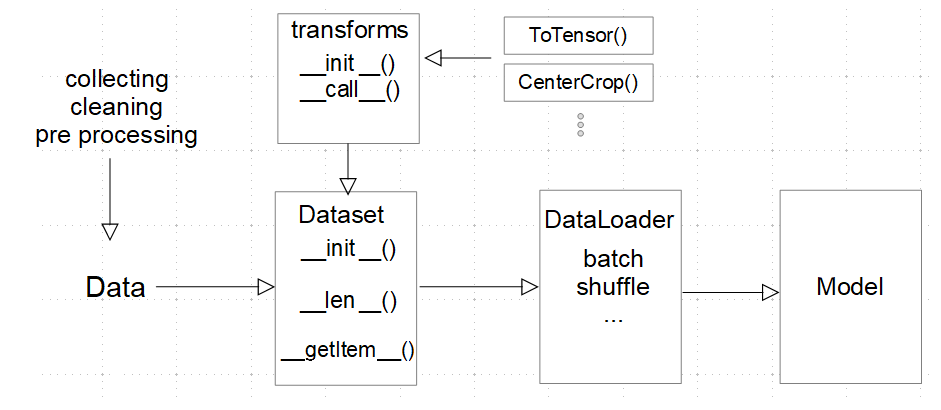

In [3]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch

data_path = '.../'

cifar10 = datasets.CIFAR10(data_path,
                           train=True,
                           download=True,
                           transform = transforms.Compose([
                                                           transforms.ToTensor(),
                           ]))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting .../cifar-10-python.tar.gz to .../


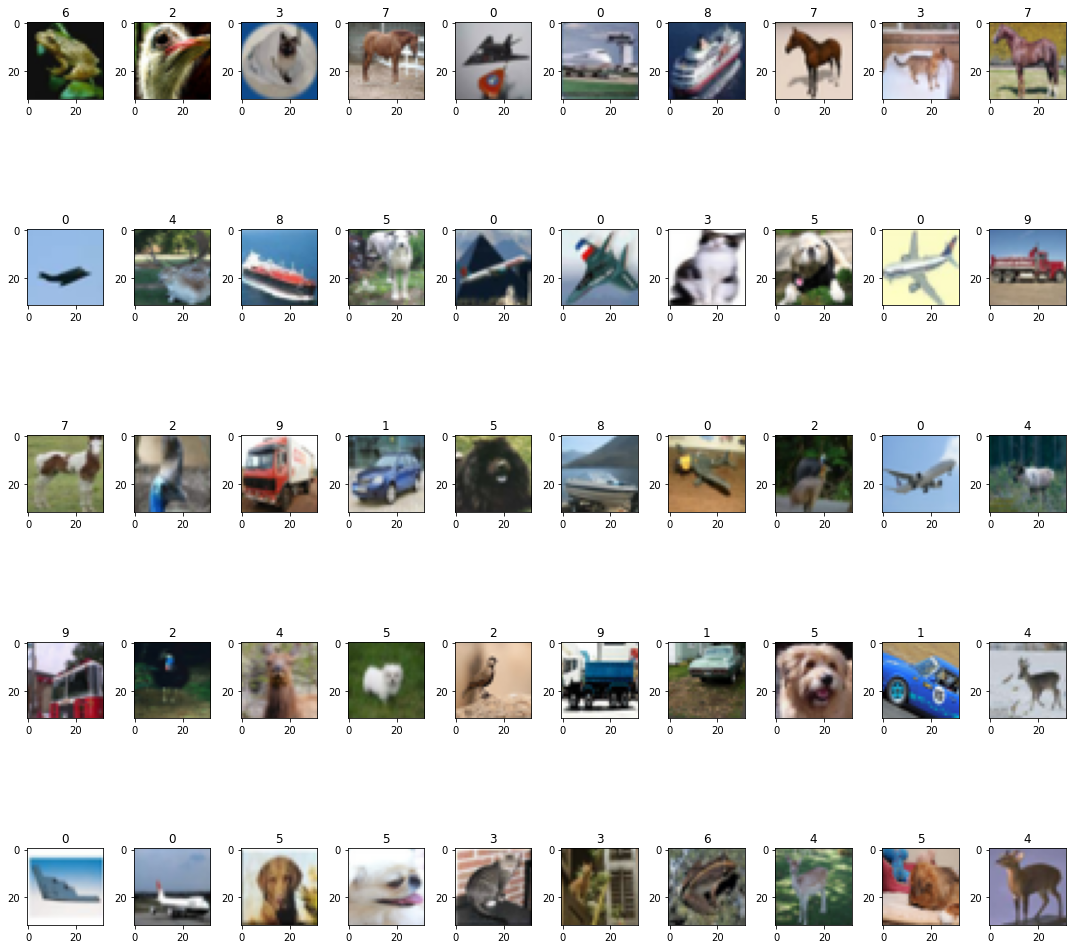

In [4]:
cifar10_loader = torch.utils.data.DataLoader(cifar10,
                                             batch_size=64,
                                             shuffle=True)

img_batch, label_batch = next(iter(cifar10_loader))

fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(15, 15))
axs = axs.ravel()
for i in range(len(axs)):
  axs[i].imshow(img_batch[i,...].permute(1,2,0).detach().numpy())
  axs[i].set_title(label_batch[i,...].detach().numpy())

fig.tight_layout()

# Convolutions

Discrete convolutions are defined for a 2D image as the scalar product of a weight matrix, the kernel, with every neighborhood in the input. Actually, they are discrete cross correlations because a mathematical convolution is a little bit different:

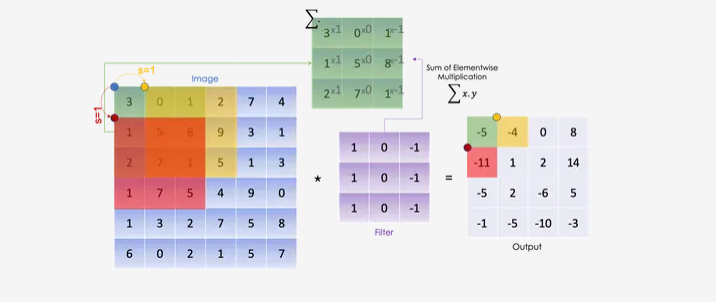

Convolution: $y(m,n) = (x * h)(m, n) = \sum_{j} \sum_{i} x(i, j)h(m - i, n - j)$

Cross-correlation: $y(m, n) = (x \cdot h)(m, n) = \sum_{j} \sum_{i} x(i, j)h(m + i, n + j)$

Characteristics are:

1. Local operations on neighborhoods
2. Translation invariance
3. Models with a lot fewer parameters.

The number of parameters depends not on the number of pixel in the image (as in fully-connected case) but rather on the size of the convolution kernel


In [5]:
# torch.nn module provides convolutions for 1, 2 and 3 dimensions.
# Arguments to convolutions are: The number of input features, the number of output
# features and the size of the kernel.

from torch import nn

conv = nn.Conv2d(3, 16, kernel_size=3)

print(conv)
print(conv.weight.shape)
print(conv.bias.shape)

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
torch.Size([16, 3, 3, 3])
torch.Size([16])


In [6]:
# As ususal, we need to add the zeroth batch dimension with unsqueeze if we 
# want to call the conv module with one input image, since nn.Conv2d 
# expects a B x C x H x W shaped tensor as input

from torchvision import datasets, transforms
data_path = '.../'
cifar10 = datasets.CIFAR10(data_path,
                           train=True,
                           download=True,
                           transform = transforms.Compose([
                                                           transforms.ToTensor()
                           ]))

img, _ = cifar10[0]
img.unsqueeze_(0)
print(f'Image shape: {img.size()}')

Files already downloaded and verified
Image shape: torch.Size([1, 3, 32, 32])


Output image shape: torch.Size([1, 16, 30, 30])


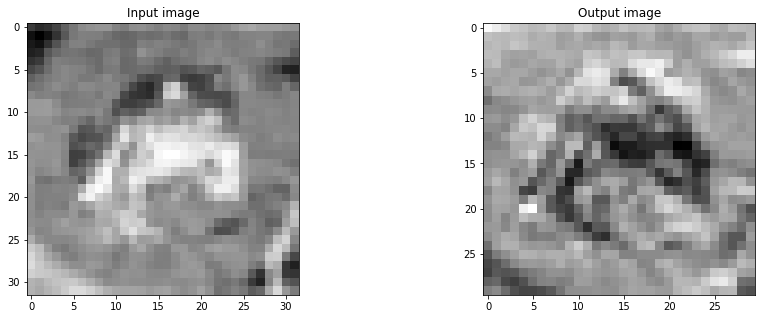

In [7]:
out_img = conv(img)
print(f"Output image shape: {out_img.shape}")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(img[0,0].detach(), cmap='gray')
axs[0].set_title('Input image')
axs[1].imshow(out_img[0,0].detach(), cmap='gray')
axs[1].set_title('Output image')
plt.show()

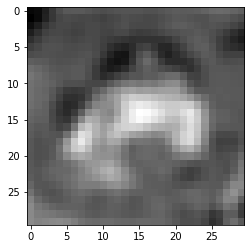

In [8]:
# We can set convolution weights manually
import torch 

with torch.no_grad():
  conv.bias.zero_()

with torch.no_grad():
  conv.weight.fill_(1.0 / 9.0)

out_img = conv(img)
plt.imshow(out_img[0,0].detach(), cmap='gray')
plt.show()

# Pytorch Autograd: Backpropagating all things

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Pytorch tensors can remember where they come from, in terms of the operations and parent tensors that originated them, and they can automatically provide the chain of derivatives of such operations with respect to their inputs. This means we will not need to derive our model by hand. Given  a  forward  expression,  no  matter  how  nested, PyTorch will automatically provide the gradient of that expression with respect to its input parameters.

***requires_grad*** argument, is telling PyTorch to track the entire family tree of tensors resulting from operations on ***params***.

In case these functions are differentiable (and most PyTorch tensor operations will be), the  value  of  the  derivative  will  be  automatically  populated  as  a  ***grad***  attribute  of  the params tensor.

PyTorch creates the autograd graph with  the  operations  (in  black  circles)  as  nodes. When we call ***loss.backward()***, PyTorch traverses this graph in the reverse direction  to  compute  the  gradients.

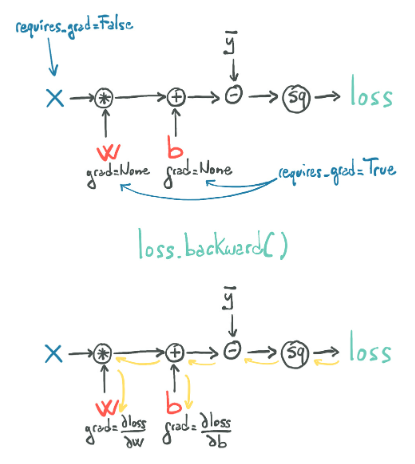

Calling ***backward()*** will lead derivatives to accumulate at leaf nodes. So if ***backward()*** was called earlier, the loss is evaluated again, ***backward()*** is called again (as in any training loop), and the gradient at each leaf is accumulated (that is, summed) on top of the one computed at the previous iteration, which leads to an incorrect value for the gradient.

In order to prevent this from occurring, we need to zero the gradient explictily at each iteration. We can do this with zero_ method.

In [9]:
import datetime

# Define training loop 

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader, device):
  loss_train_list = list()
  loss_val_list = list()

  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    loss_val = 0.0
    loss = 0
    for imgs, labels in train_loader:
      imgs = imgs.to(device)
      labels = labels.to(device)
      model.train()
      outputs = model(imgs) 
      loss = loss_fn(outputs, labels)#Forward 
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      loss_train += (loss.item() / train_loader.batch_size)

    if epoch == 1 or epoch % 10 == 0:
      print(f"{datetime.datetime.now()} Epoch: {epoch}, Training_loss:{loss_train /len(train_loader):.4f}")
    loss_train_list.append(loss_train /len(train_loader))

    loss = 0
    for imgs_val, labels_val in val_loader:
      imgs_val = imgs_val.to(device)
      labels_val = labels_val.to(device)
      model.eval()
      outputs_val = model(imgs_val)
      loss = loss_fn(outputs_val, labels_val)
      loss_val += (loss.item() / val_loader.batch_size)

    if epoch == 1 or epoch % 10 == 0:
      print(f"{datetime.datetime.now()} Epoch: {epoch}, Validation_loss:{loss_val /len(val_loader):.4f}")
    
    loss_val_list.append(loss_val /len(val_loader))

  return loss_train_list, loss_val_list

# Neural networks

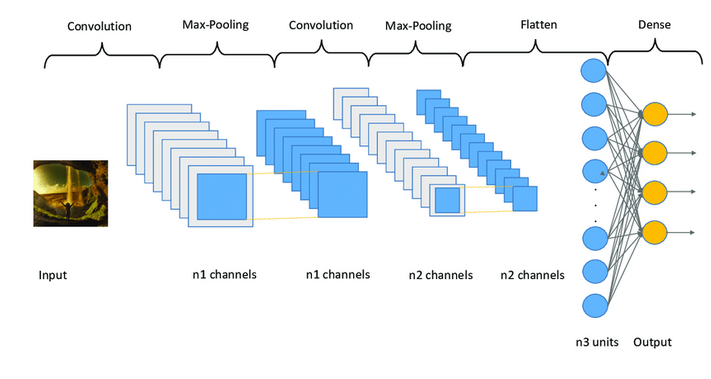

Pytorch has a whole submodule dedicated to neural netwoks, called ***torch.nn***
A Pytorch module is a Python class deriving from the ***nn.Module*** base class.

A module has one or more parameter instances as attributes which are tensors whose values are optimized during the training process.

A module can also have one or more submodules as attributes, an it will be able to track their parameters as well.

We include submodules in the constructor ***\__init__*** and assign them to self in forward function.

For situations where your model requires a list or dict of submodules, Pytorch provides ***nn.ModuleList*** and ***nn.ModuleDict***.

***nn.Module*** provides a simple way to concatenate modules through the ***nn.Sequential*** container


Pytorch allows us to use any computation in our model by subclassing ***nn.Module***.

At a mininum we need to define a ***forward*** function that takes the inputs to the module and returns the output.

We can also use subclasses to define new building blocks for more complex networks.

The submodules must be top-level attributes, not buried inside list or dict intances!. Otherwise, the optimizer will not be able to locate the submodules (and, hence, their parameters). For situations where your model requires a list or dict of submodules, PyTorch provides ***nn.ModuleList*** and ***nn.ModuleDict***

In [10]:

from torch import nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=(3,3), padding=1)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=(3,3), padding=1)
    self.fc1 = nn.Linear(8 * 8 * 8, 32)
    self.fc2 = nn.Linear(32, 2)
  
  def forward(self, x):
    out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
    out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
    out = out.view(-1, 8 * 8 * 8) 
    out = torch.tanh(self.fc1(out))
    out = self.fc2(out)
    return out


In [11]:
# Inspecting parameters
model = Net()
[param.shape for param in model.parameters()]

[torch.Size([16, 3, 3, 3]),
 torch.Size([16]),
 torch.Size([8, 16, 3, 3]),
 torch.Size([8]),
 torch.Size([32, 512]),
 torch.Size([32]),
 torch.Size([2, 32]),
 torch.Size([2])]

In [12]:
# When inspecting parameters of a model made up of several submodules, it is handy to be able 
# to identify parameters by name. There is a method for that called named_parameters
for name, param in model.named_parameters():
  print(name, param.shape)

conv1.weight torch.Size([16, 3, 3, 3])
conv1.bias torch.Size([16])
conv2.weight torch.Size([8, 16, 3, 3])
conv2.bias torch.Size([8])
fc1.weight torch.Size([32, 512])
fc1.bias torch.Size([32])
fc2.weight torch.Size([2, 32])
fc2.bias torch.Size([2])


In [13]:
# Check parameters
numel_list = [(n,p.numel()) for n, p in model.named_parameters()]
numel_list

[('conv1.weight', 432),
 ('conv1.bias', 16),
 ('conv2.weight', 1152),
 ('conv2.bias', 8),
 ('fc1.weight', 16384),
 ('fc1.bias', 32),
 ('fc2.weight', 64),
 ('fc2.bias', 2)]

In [14]:
# Sequential also accepts an OrderDict, in which we can name each module passed to Sequential
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
                                       ('hidden_linear', nn.Linear(1, 8)),
                                       ('hidden_activation', nn.Tanh()),
                                       ('output_linear', nn.Linear(8,1))
]))

for name, param in seq_model.named_parameters():
  print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


# Optimizers

Every optimizer constructor takes a list of parameters (aka Pytorch tensors).
All parameters passed to the optimizer are  retained inside the optimizer object so the optimizer can update their values and access their grad attribute

In [15]:
from torch import optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

# Example with CIFAR dataset

In [16]:
# Define Data Pipeline
import torch 

imgs = torch.stack([img_t for img_t, _ in cifar10], dim=3)

transformed_cifar10 = datasets.CIFAR10(data_path,
                                       train=True,
                                       download=True,
                                       transform = transforms.Compose([
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize(imgs.view(3, -1).mean(dim=1), 
                                                                                           imgs.view(3, -1).std(dim=1))
                                      ]))


transformed_cifar10_val = datasets.CIFAR10(data_path,
                                           train=False,
                                           download=True,
                                            transform = transforms.Compose([
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize(imgs.view(3, -1).mean(dim=1), 
                                                                                           imgs.view(3, -1).std(dim=1))
                                      ]))

Files already downloaded and verified
Files already downloaded and verified


In [17]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0,2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0,2]]

train_loader = torch.utils.data.DataLoader(cifar2,
                                           batch_size=64,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(cifar2_val,
                                        batch_size=64,
                                        shuffle=True)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Net().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

loss_train_list, loss_val_list = training_loop(n_epochs=5000, 
                                               optimizer=optimizer, 
                                               model=model, 
                                               loss_fn=loss_fn, 
                                               train_loader=train_loader, 
                                               val_loader=val_loader, 
                                               device=device)

2021-09-27 09:15:25.472328 Epoch: 1, Training_loss:0.0070
2021-09-27 09:15:25.533425 Epoch: 1, Validation_loss:0.0062
2021-09-27 09:15:32.651396 Epoch: 10, Training_loss:0.0052
2021-09-27 09:15:32.705602 Epoch: 10, Validation_loss:0.0051
2021-09-27 09:15:40.670577 Epoch: 20, Training_loss:0.0047
2021-09-27 09:15:40.727036 Epoch: 20, Validation_loss:0.0051
2021-09-27 09:15:48.764480 Epoch: 30, Training_loss:0.0047
2021-09-27 09:15:48.818642 Epoch: 30, Validation_loss:0.0052
2021-09-27 09:15:56.827790 Epoch: 40, Training_loss:0.0046
2021-09-27 09:15:56.882721 Epoch: 40, Validation_loss:0.0050
2021-09-27 09:16:04.876832 Epoch: 50, Training_loss:0.0042
2021-09-27 09:16:04.935182 Epoch: 50, Validation_loss:0.0051
2021-09-27 09:16:12.897482 Epoch: 60, Training_loss:0.0045
2021-09-27 09:16:12.951473 Epoch: 60, Validation_loss:0.0050
2021-09-27 09:16:20.916722 Epoch: 70, Training_loss:0.0043
2021-09-27 09:16:20.970267 Epoch: 70, Validation_loss:0.0051
2021-09-27 09:16:28.880738 Epoch: 80, Trai

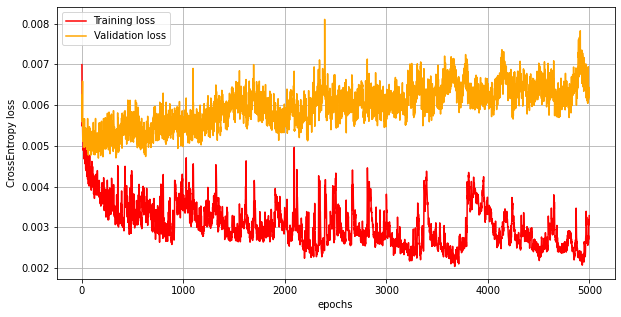

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5))
plt.plot(loss_train_list, c='red', label='Training loss')
plt.plot(loss_val_list, c='orange', label='Validation loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('CrossEntropy loss')
plt.legend()
fig.show()

In [ ]:
torch.save(model.state_dict(), './model.pth')

In [ ]:
model = Net()
model.load_state_dict(torch.load('./model.pth'))
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

# Different Arquitectures and Pytorch Hub

In [18]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [19]:
alexnet = models.AlexNet()
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
import torch 
from torch import hub 
resnet18_model = hub.load('pytorch/vision:master', 'resnet18', pretrained=True)

In [ ]:
resnet18_model